In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 

In [5]:
data=pd.read_csv("C:/Users/Bhaskar22/Desktop/MINIPROJECT/data/TelecomUsageDemoone.csv")
data.head()

,CUSTOMERID,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,...,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,MONTHLY_MINUTES_OF_USE,TOTAL_MINUTES_OF_USE,MONTHLY_SMS,TOTAL_SMS,CHURN
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,0,0,No
1,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,One year,No,Bank transfer (automatic),42.30,1840.75,0,0,0,0,No
2,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,Month-to-month,No,Mailed check,29.75,301.90,0,0,0,0,No
3,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Month-to-month,Yes,Electronic check,39.65,39.65,0,0,0,0,Yes
4,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,...,Month-to-month,No,Electronic check,30.20,30.20,0,0,0,0,Yes


In [6]:

data['MULTIPLELINES'].replace('No phone service','No',inplace=True)
data['ONLINESECURITY'].replace('No internet service','No',inplace=True)
data['ONLINEBACKUP'].replace('No internet service','No',inplace=True)
data['DEVICEPROTECTION'].replace('No internet service','No',inplace=True)
data['TECHSUPPORT'].replace('No internet service','No',inplace=True)
data['STREAMINGTV'].replace('No internet service','No',inplace=True)
data['STREAMINGMOVIES'].replace('No internet service','No',inplace=True)
data=pd.get_dummies(data,columns=["GENDER","PARTNER","DEPENDENTS","PHONESERVICE","MULTIPLELINES","INTERNETSERVICE","ONLINEBACKUP","ONLINESECURITY","DEVICEPROTECTION","TECHSUPPORT","STREAMINGTV","STREAMINGMOVIES","CONTRACT","PAPERLESSBILLING","PAYMENTMETHOD"],drop_first=True)
data['CHURN'] = data['CHURN'].apply(lambda x: 0 if x=='No' else 1)
data.head()


,CUSTOMERID,SENIORCITIZEN,TENURE,MONTHLYCHARGES,TOTALCHARGES,MONTHLY_MINUTES_OF_USE,TOTAL_MINUTES_OF_USE,MONTHLY_SMS,TOTAL_SMS,CHURN,...,DEVICEPROTECTION_Yes,TECHSUPPORT_Yes,STREAMINGTV_Yes,STREAMINGMOVIES_Yes,CONTRACT_One year,CONTRACT_Two year,PAPERLESSBILLING_Yes,PAYMENTMETHOD_Credit card (automatic),PAYMENTMETHOD_Electronic check,PAYMENTMETHOD_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,7795-CFOCW,0,45,42.30,1840.75,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
2,6713-OKOMC,0,10,29.75,301.90,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,8779-QRDMV,1,1,39.65,39.65,0,0,0,0,1,...,1,0,0,1,0,0,1,0,1,0
4,8665-UTDHZ,0,1,30.20,30.20,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


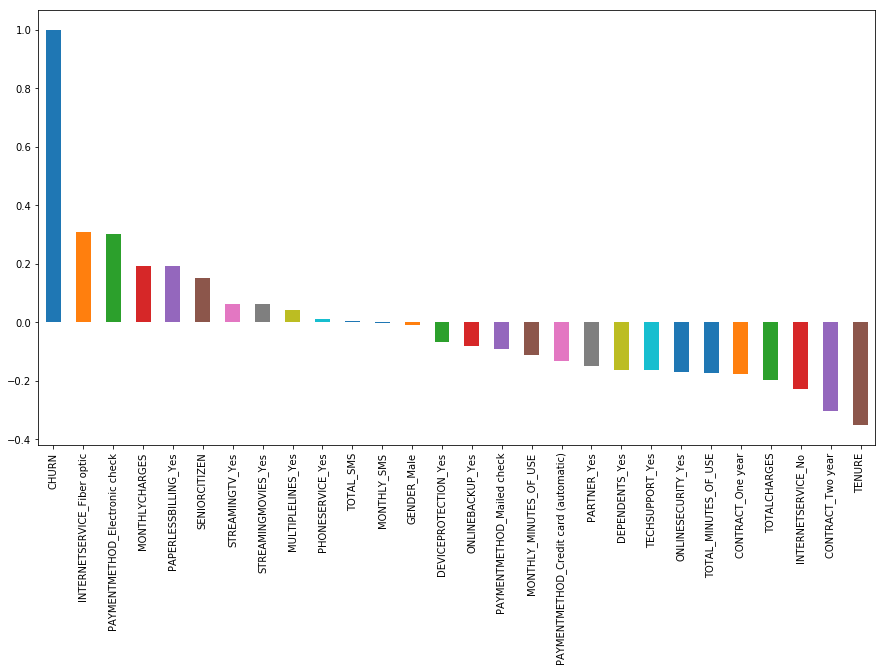

In [7]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
data.corr()['CHURN'].sort_values(ascending = False).plot(kind='bar')

In [75]:
data.drop(["CUSTOMERID"],axis=1,inplace=True)
features = data.drop(["CHURN"],axis=1).columns
data_train,data_test = train_test_split(data,test_size=0.25)
print(features)

Index(['SENIORCITIZEN', 'TENURE', 'MONTHLYCHARGES', 'TOTALCHARGES',
       'MONTHLY_MINUTES_OF_USE', 'TOTAL_MINUTES_OF_USE', 'MONTHLY_SMS',
       'TOTAL_SMS', 'GENDER_Male', 'PARTNER_Yes', 'DEPENDENTS_Yes',
       'PHONESERVICE_Yes', 'MULTIPLELINES_Yes', 'INTERNETSERVICE_Fiber optic',
       'INTERNETSERVICE_No', 'ONLINEBACKUP_Yes', 'ONLINESECURITY_Yes',
       'DEVICEPROTECTION_Yes', 'TECHSUPPORT_Yes', 'STREAMINGTV_Yes',
       'STREAMINGMOVIES_Yes', 'CONTRACT_One year', 'CONTRACT_Two year',
       'PAPERLESSBILLING_Yes', 'PAYMENTMETHOD_Credit card (automatic)',
       'PAYMENTMETHOD_Electronic check', 'PAYMENTMETHOD_Mailed check'],
      dtype='object')


In [76]:
Accuracy_score = []
for i in range(1,50):    
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(data_train[features],data_train["CHURN"])
    pred_clf = clf.predict(data_test[features])
    probs = clf.predict_proba(data_test[features])
    score = clf.score(data_test[features], data_test["CHURN"])
    Accuracy_score.append(clf.score(data_test[features], data_test["CHURN"]))
    max(Accuracy_score)

In [77]:
print("Accuracy_score:",max(Accuracy_score)*100)

Accuracy_score: 78.93242475865985


In [78]:
# Eavluation of model: Confusion matrix.
pd.DataFrame(confusion_matrix(data_test["CHURN"],pred_clf),columns=["Predicted False","Predicted True"],index=["Actual False","Actual True"])

,Predicted False,Predicted True
Actual False,1118,163
Actual True,223,257


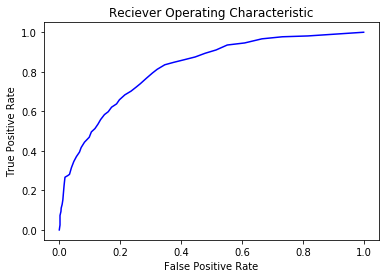

In [79]:
#Plotting of ROC Curve.
fpr, tpr, thresholds = roc_curve(data_test["CHURN"],probs[:,1])
plt.title("Reciever Operating Characteristic")
plt.plot(fpr,tpr,'b')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [80]:
# Use Logistic Regression, fit and score model.
lr = LogisticRegression(penalty='l1')
lr.fit(data_train[features],data_train["CHURN"])
lr_predict = lr.predict(data_test[features])

In [81]:
accuracy_score = lr.score(data_test[features],data_test["CHURN"])
print("Accuracy : ", accuracy_score*100)

Accuracy :  79.7274275979557


In [82]:
# Eavluation of model: Confusion matrix.
pd.DataFrame(confusion_matrix(data_test["CHURN"],lr_predict),columns=["Predicted False","Predicted True"],index=["Actual False","Actual True"])


,Predicted False,Predicted True
Actual False,1134,147
Actual True,210,270


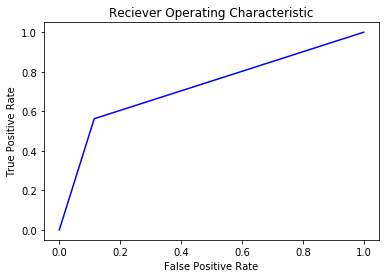

In [83]:
#Plotting of ROC Curve.
fpr, tpr, thresholds = roc_curve(data_test["CHURN"],lr_predict)
plt.title("Reciever Operating Characteristic")
plt.plot(fpr,tpr,'b')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [19]:
# Use Support Vector Machine,fit and score the model.
from sklearn.svm import SVC
model_svm = SVC(kernel='linear') 
model_svm.fit(data_train[features],data_train["CHURN"])
preds = model_svm.predict(data_test[features])

In [20]:
# Accuracy score for the model.
accuracy_score=model_svm.score(data_test[features],data_test["CHURN"])
print("Accuracy : ", accuracy_score*100)

Accuracy :  76.94491766042022


In [21]:
# Eavluation of model: Confusion matrix.
pd.DataFrame(confusion_matrix(data_test["CHURN"],preds),columns=["Predicted False","Predicted True"],index=["Actual False","Actual True"])

,Predicted False,Predicted True
Actual False,1166,114
Actual True,292,189


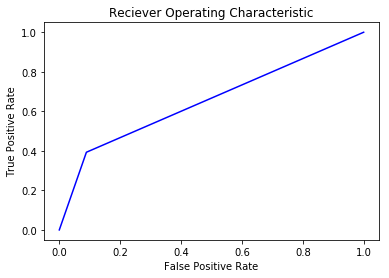

In [22]:
#Plotting of ROC Curve.
fpr, tpr, thresholds = roc_curve(data_test["CHURN"],preds)
plt.title("Reciever Operating Characteristic")
plt.plot(fpr,tpr,'b')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [84]:
# Find out importance of each feature on predicting variable(churn).
data_f = pd.DataFrame(clf.feature_importances_, columns = ['importance'])
data_f['labels'] = features
data_f.sort_values('importance',ascending=False)

,importance,labels
3,0.111623,TOTALCHARGES
1,0.110012,TENURE
2,0.106228,MONTHLYCHARGES
4,0.100449,MONTHLY_MINUTES_OF_USE
5,0.091952,TOTAL_MINUTES_OF_USE
6,0.076818,MONTHLY_SMS
7,0.075705,TOTAL_SMS
13,0.039861,INTERNETSERVICE_Fiber optic
25,0.036789,PAYMENTMETHOD_Electronic check
22,0.034062,CONTRACT_Two year


In [10]:
print("Correlation:",data['TOTALCHARGES'].corr(data['TOTAL_MINUTES_OF_USE']))

Correlation: 0.9644537159583317


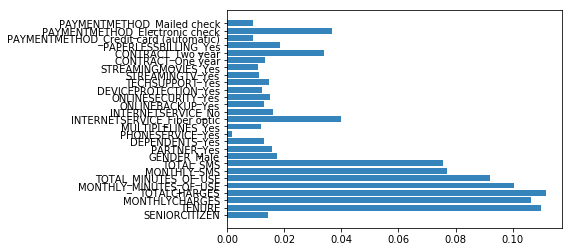

In [86]:
y_pos = np.arange(len(data_f['labels']))
y = data_f['importance'].tolist()
x = data_f['labels'].tolist()
plt.barh(y_pos,y,align='center',alpha=0.9)
plt.yticks(y_pos,x)
plt.show()